In [11]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import ConciseDateFormatter, AutoDateLocator

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


class CovidDF(object):
    
    def __init__(self, loc="co"):
        self.loc = loc.upper()
        if loc.lower() == 'us':
            url = "https://covidtracking.com/api/v1/us/daily.json"
        else:
            url = "https://covidtracking.com/api/v1/states/{}/daily.json".format(loc.lower())
        response = requests.get(url, allow_redirects=False)
        content = json.loads(response.content)
        self.df = pd.DataFrame(content)
        self.df['date'] = pd.to_datetime(self.df['date'], format = '%Y%m%d')
        
    def plotField(self, field="positive"):
        fig, ax = plt.subplots(1, 1, figsize=(10, 7))
        
        title_fs = 24
        label_fs = 18
        tick_fs = 14
        
        dates = self.df['date'].array
        data = self.df[field].array.to_numpy()
        
        ax.plot(dates, data, 'k-', lw=2)
        
        ax.set_title("Covid-19 Statistics for {}".format(self.loc), fontsize=title_fs)
        ax.set_xlabel("Date", fontsize=label_fs)
        ax.set_ylabel(field, fontsize=label_fs)
        locator = AutoDateLocator()
        formatter = ConciseDateFormatter(locator)
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_major_locator(locator)
        ax.tick_params(axis='both', labelsize=tick_fs)
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))
        
        plt.show()
        
    def groupby_weekday(self):
        self.df['WeekNumber'] = self.df['date'].dt.week
        self.df['DayOfWeek'] = self.df['date'].dt.dayofweek
        weekGroup = self.df.groupby(self.df['WeekNumber'])
        weeklyTestResults = weekGroup["totalTestResultsIncrease"].sum()[self.df["WeekNumber"]].array
        self.df['TestPortionOfTheWeek'] = self.df["totalTestResultsIncrease"].array / weeklyTestResults
        
        title_fs = 24
        label_fs = 18
        tick_fs = 14
        
        ax = self.df.plot.scatter(x='DayOfWeek', y='TestPortionOfTheWeek', c='DarkBlue')
        
        ax.set_title("Covid-19 Test Results for {}".format(self.loc), fontsize=title_fs)
        ax.set_xlabel("Day of Week", fontsize=label_fs)
        ax.set_ylabel("Portion of Test Results", fontsize=label_fs)
        ax.tick_params(axis='both', labelsize=tick_fs)
        plt.show()

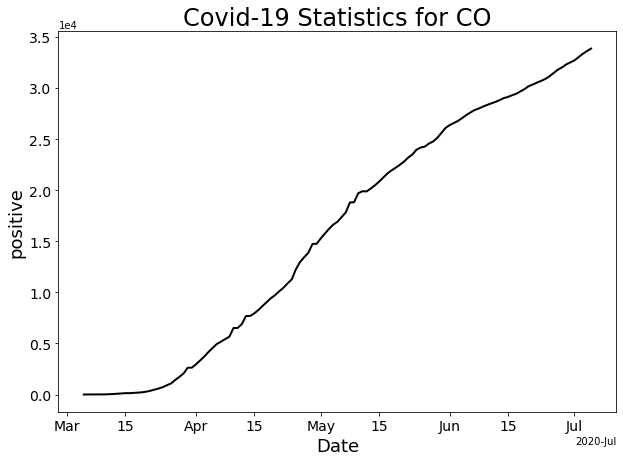

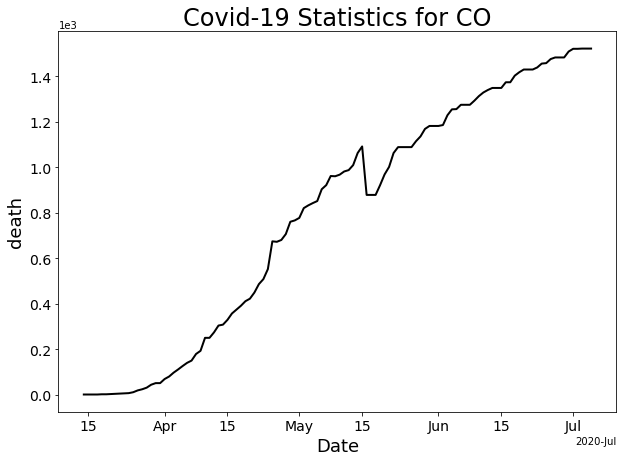

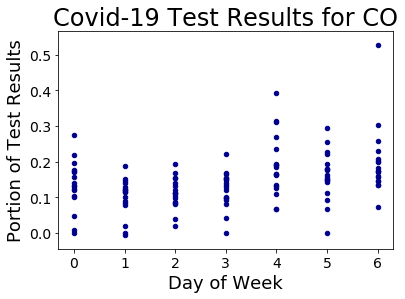

In [12]:
covidDF = CovidDF(loc="co")
covidDF.plotField("positive")
covidDF.plotField("death")
covidDF.groupby_weekday()

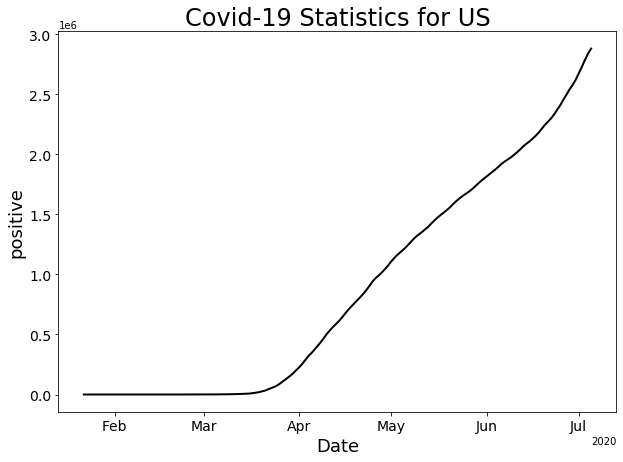

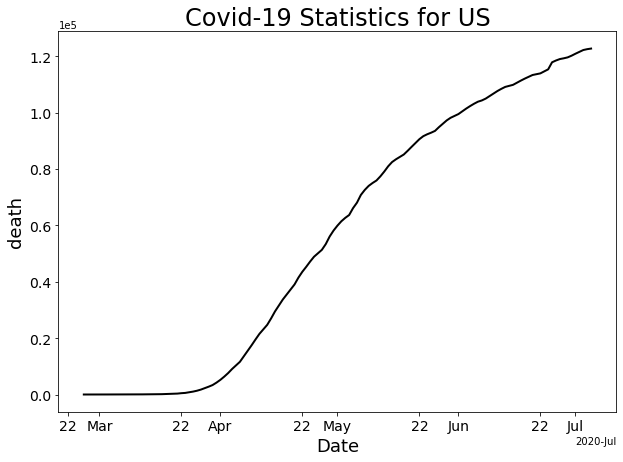

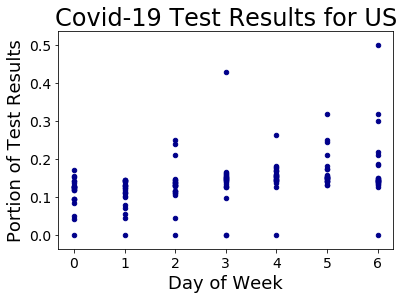

In [13]:
covidDF2 = CovidDF(loc="us")
covidDF2.plotField("positive")
covidDF2.plotField("death")
covidDF2.groupby_weekday()